# 1. Importing The Necessary libraries


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


%matplotlib inline

# 2. Importing my Data Set

In [ ]:
# I'm using this cell of code to access the data file in the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Data Folder /LendingClubLoans2018-2020 (1).xlsx", sheet_name=0)
df.head(5)

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,annual_inc,annual_inc_joint,verification_status,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,2001-01-01,2017-08-01,2020-04-01,NaT,110000.0,NaN,Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,...,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,2000-12-01,2017-07-01,2019-06-01,NaT,54000.0,NaN,Not Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,...,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,113672609,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,1986-04-01,2017-07-01,2020-05-01,2020-06-01,74000.0,NaN,Verified,NaN,n,home_improvement,N,NaN,NaN,NaN,NaT,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,...,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,115053799,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,1990-02-01,2017-08-01,2019-10-01,NaT,58000.0,NaN,Source Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,...,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,1988-03-01,2013-08-01,2019-01-01,NaT,94020.0,NaN,Verified,NaN,n,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,2017-11-01,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,...,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43


# 3. Data Wrangling

## 3.1 General Properties

In [ ]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(77159, 108)

In [ ]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,loan_amnt,int_rate,installment,annual_inc,annual_inc_joint,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_last_record,mths_since_last_major_derog,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
count,7.715900e+04,77159.000000,77159.000000,77159.000000,7.715900e+04,9.382000e+03,77051.000000,9382.000000,77159.000000,74664.000000,74664.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,74664.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,74664.00000,77159.000000,7.715900e+04,74664.000000,7.715900e+04,7.715900e+04,77159.000000,77159.000000,7.715900e+04,11357.000000,19874.000000,...,77159.000000,77159.000000,74664.000000,74664.000000,74664.000000,63897.000000,76005.000000,74648.000000,77056.000000,74664.000000,74664.000000,74664.000000,77152.000000,76043.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77159.000000,77154.000000,76040.000000,77159.000000,77159.000000,9382.000000,4491.000000,6117.000000,6117.000000,6117.000000,5989.000000
mean,1.152632e+08,15156.519978,0.131401,443.024291,7.836316e+04,1.200300e+05,19.690700,19.616616,0.321012,0.967709,1.943641,0.497635,701.786247,705.786558,689.304255,676.649840,1.368123,11.469641,0.876232,4.362809,0.171581,22.801475,2378.177021,2377.853405,14781.449880,14776.457026,11370.728713,3248.986109,3.114224,1.38254,205.682616,1.419339e+05,35494.795752,3.507409e+04,1.800557e+05,51530.119727,24192.264441,4.562770e+04,76.763494,43.975999,...,14.801877,8.674892,2.826596,0.610281,1.473776,67.884689,54.589976,56.530838,0.476718,1.229307,2.657090,5711.205012,13693.830931,12649.580277,158.620766,0.008359,27.857207,0.022486,0.512345,3.612009,5.442826,4.732008,7.080639,8.258635,8.014438,12.965228,5.365142,11.430565,0.086354,1.948120,93.762679,38.434283,0.127866,0.038829,32400.147197,2.272545,157.217314,6925.184353,694.179147,223.813354
std,2.033129e+07,9749.195616,0.051024,279.917146,8.492549e+04,6.042086e+04,21.589715,7.643524,0.932101,1.431024,2.257943,0.792988,34.730335,34.731622,75.789653,115.094757,1.759040,5.757780,1.088759,3.106743,0.511936,11.772159,4784.588070,4784.478934,10340.568269,10337.523221,8469.378176,3297.565804,19.569433,2.54391,1578.395291,1.617299e+05,44426.580647,3.523961e+04,1.860249e+05,51303.246871,24153.323989,4.674891e+04,24.746707,21.861807,...,18.309354,9.356698,3.051641,0.851951,1.489970,24.478463,28.999470,21.310069,0.249860,1.448808,2.516521,5900.140827,16841.883928,17674.285312,759.320069,0.101800,134.871297,0.163158,1.466351,2.381453,3.418811,3.124582,4.466702,7.322986,4.747998,7.772846,3.281323,5.738928,0.570806,1.778157,9.761986,36.271699,0.346214,0.352836,26588.310055,0.583821,277.110950,7026.968193,1568.831655,332.369244
min,1.227221e+06,1000.000000,0.053200,7.610000,0.000000e+00

In [ ]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Columns: 108 entries, id to orig_projected_additional_accrued_interest
dtypes: datetime64[ns](5), float64(49), int64(39), object(15)
memory usage: 63.6+ MB


## 3.2 Dealing With Missing Values

In [ ]:
# which column has a missing values
df.columns[df.isnull().any()]

Index(['emp_title', 'next_pymnt_d', 'annual_inc_joint',
       'verification_status_joint', 'hardship_flag', 'hardship_reason',
       'hardship_type', 'hardship_status', 'payment_plan_start_date', 'dti',
       'dti_joint', 'inq_fi', 'inq_last_12m', 'open_acc_6m', 'total_cu_tl',
       'total_bal_il', 'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_rcnt_il', 'mths_since_last_delinq',
       'mths_since_recent_revol_delinq', 'mo_sin_old_il_acct', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'il_util', 'bc_util', 'all_util',
       'revol_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'avg_cur_bal',
       'bc_open_to_buy', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'revol_bal_joint', 'deferral_term', 'hardship_amount',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'orig_projected_additional_accrued_interest'],
      dtype='object

In [ ]:
#sum missing data in rows
sum([True for idx,row in df.iterrows() if any(row.isnull())])

77153

## 3.3 Dropping Columns with more than 60% missing values


#### These Columns haven't many records, so keeping them will lead to drop almost many rows almost 99% of all rows.

In [ ]:
df.isnull().sum().sort_values(ascending=False)


hardship_status               72668
payment_plan_start_date       72668
hardship_reason               72668
hardship_type                 72668
deferral_term                 72668
                              ...  
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
mo_sin_old_rev_tl_op              0
id                                0
Length: 108, dtype: int64

In [ ]:
# I will check the first 50 columns sorted by missing values:
df.isnull().sum().sort_values(ascending=False).head(50)

hardship_status                               72668
payment_plan_start_date                       72668
hardship_reason                               72668
hardship_type                                 72668
deferral_term                                 72668
orig_projected_additional_accrued_interest    71170
hardship_last_payment_amount                  71042
hardship_amount                               71042
hardship_payoff_balance_amount                71042
verification_status_joint                     67780
dti_joint                                     67777
revol_bal_joint                               67777
annual_inc_joint                              67777
mths_since_last_record                        65802
mths_since_recent_bc_dlq                      59765
mths_since_last_major_derog                   57285
mths_since_recent_revol_delinq                51792
next_pymnt_d                                  43903
mths_since_last_delinq                        39645
il_util     

In [ ]:
# let's drop these columns with 60% missing values or more
# 60% of 77159 is 46,295 so i will remove Columns with missing values less than 46,295 value
DropColumn = df.isnull().sum().sort_values(ascending=False).head(17).index
df = df.drop(columns=DropColumn)
df.shape

(77159, 91)

In [ ]:
# Here, i will check my data for missing values
df.isnull().sum().sort_values(ascending=False).head(50)

next_pymnt_d              43903
mths_since_last_delinq    39645
il_util                   13262
mths_since_recent_inq      9243
emp_title                  5862
mths_since_rcnt_il         4879
all_util                   2511
total_bal_il               2495
open_act_il                2495
open_rv_12m                2495
open_il_24m                2495
open_il_12m                2495
open_rv_24m                2495
max_bal_bc                 2495
inq_fi                     2495
inq_last_12m               2495
total_cu_tl                2495
open_acc_6m                2495
mo_sin_old_il_acct         2437
hardship_flag              1627
bc_util                    1154
percent_bc_gt_75           1119
bc_open_to_buy             1116
mths_since_recent_bc       1047
dti                         108
revol_util                  103
avg_cur_bal                   7
pct_tl_nvr_dlq                5
open_acc                      0
mort_acc                      0
delinq_2yrs                   0
last_fic

## 3.5 Here I will drop Column Out of my Interest, Which won't affect the Results
1.   **emp_title** ; As annual_inc_job will present a good estimation for the fianace matter for each loan maker
2.   **term** ; As installment gives the same information in different form
3.   **earliest_cr_line**, **issue_d, last_pymnt_d**, **next_pymnt_d**
4.   **pymnt_plan, hardship_fla**; As  all rows have the same value
5.   **inq_fi, inq_last_12m** , **inq_last_6mths** ; As the Number of  finance  inquiries wont affect the ability of loan payment
6.   **last_fico_range_high**, **last_fico_range_low** ; As fico_range_low, fico_range_high give the same information
7.   **mort_acc**, **open_acc**, **open_acc_6m**, **acc_open_past_24mths**, **pub_rec**; As total_acc can replace them
8.   **total_pymnt_inv**; total_pymnt has the same values 
9.   **tot_coll_amt**, **total_cu_tl**, **total_rec_late_fee** ; the majority of its rows are zeros 
10. **chargeoff_within_12_mths**, **collection_recovery_fee** , **collections_12_mths_ex_med** , **num_accts_ever_120_pd** ,**num_tl_90g_dpd_24m** ,**tax_liens** , **pub_rec_bankruptcies** ;the majority of its rows are zeros 

In [ ]:
df.drop(['emp_title','term','earliest_cr_line','issue_d','last_pymnt_d','next_pymnt_d'
,'pymnt_plan','inq_fi','inq_last_12m','inq_last_6mths',
'last_fico_range_high','last_fico_range_low','mort_acc','open_acc','open_acc_6m','acc_open_past_24mths','pub_rec',
'total_pymnt_inv','tot_coll_amt','total_cu_tl','total_rec_late_fee','chargeoff_within_12_mths','collection_recovery_fee',
'collections_12_mths_ex_med','num_tl_90g_dpd_24m','tax_liens','pub_rec_bankruptcies'], axis=1, inplace=True)

In [ ]:
df.shape

(77159, 64)

## 3.5 Dropping Missing Values in each row After Dropping Unnecessary Columns

In [ ]:
df = df.dropna()
df.shape

(27753, 64)

## 3.6 Dropping Duplicated Data if any

In [ ]:
# There is no duplicated values
df.duplicated().sum()

0

# 4. Data Exploration

## 4.1 Lets have a look at each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27753 entries, 0 to 77157
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          27753 non-null  int64  
 1   application_type            27753 non-null  object 
 2   home_ownership              27753 non-null  object 
 3   loan_status                 27753 non-null  object 
 4   loan_amnt                   27753 non-null  int64  
 5   int_rate                    27753 non-null  float64
 6   installment                 27753 non-null  float64
 7   grade                       27753 non-null  object 
 8   annual_inc                  27753 non-null  float64
 9   verification_status         27753 non-null  object 
 10  purpose                     27753 non-null  object 
 11  hardship_flag               27753 non-null  object 
 12  dti                         27753 non-null  float64
 13  delinq_2yrs                 277

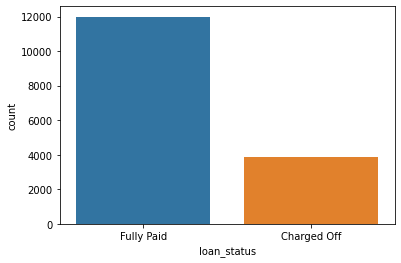

In [ ]:
df.loan_status.value_counts()
df = df[df.loan_status.isin(['Fully Paid', 'Charged Off'])]
sns.countplot(x="loan_status", data=df);


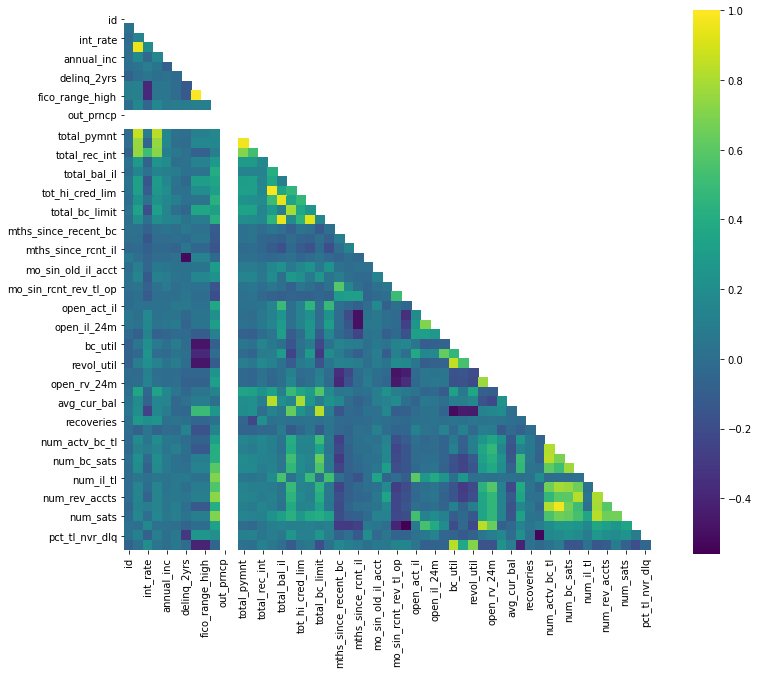

In [ ]:
# the correlation between continuous variables:
plt.figure(figsize=(12,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='viridis', mask=mask, annot=False, square=True);

In [ ]:
# there is one columns with a visible different behaviour: ['out_prncp'], I will drop it

df.drop(['out_prncp'], axis=1 , inplace=True)
df.shape

(15848, 63)

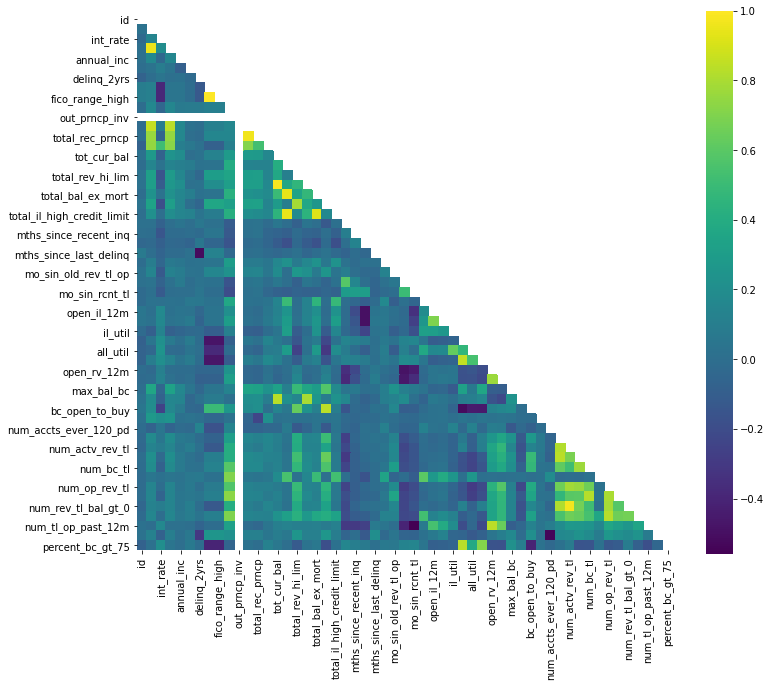

In [ ]:
plt.figure(figsize=(12,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='viridis', mask=mask, annot=False, square=True);

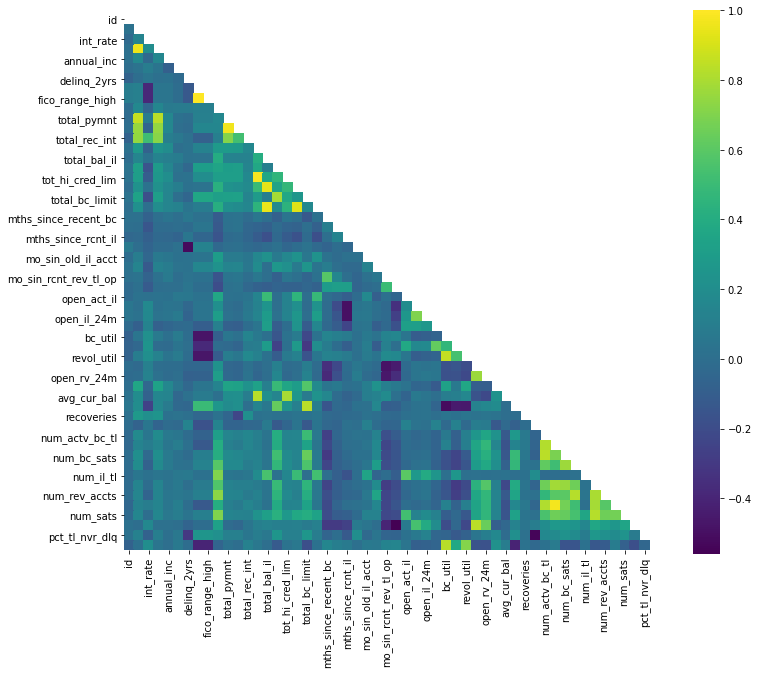

In [ ]:
# there is still one more columns with a visible different behaviour: ['out_prncp_inv'], I will drop it

df.drop(['out_prncp_inv'], axis=1 , inplace=True)
df.shape
plt.figure(figsize=(12,10))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='viridis', mask=mask, annot=False, square=True);

## 4.2 Let's Check for Correlation between The Variables

In [ ]:
c = df.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']


# check feature pairs above 0.8 in correlation

cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.80)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,tot_hi_cred_lim,tot_cur_bal,0.982827
2,num_rev_tl_bal_gt_0,num_actv_rev_tl,0.973243
3,total_rec_prncp,total_pymnt,0.968313
4,loan_amnt,installment,0.952128
5,total_bal_il,total_il_high_credit_limit,0.949151
6,total_bal_il,total_bal_ex_mort,0.943659
7,total_bal_ex_mort,total_il_high_credit_limit,0.922082
8,loan_amnt,total_pymnt,0.860400
9,bc_util,revol_util,0.855327
10,bc_open_to_buy,total_bc_limit,0.840952


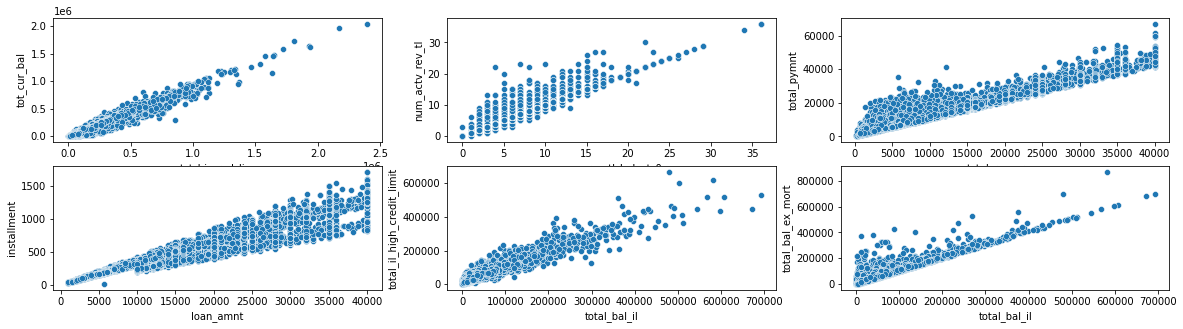

In [ ]:
plt.figure(figsize = [20, 5]) 


plt.subplot(2, 3, 1)
sns.scatterplot(x=df.tot_hi_cred_lim, y=df.tot_cur_bal)
	
plt.subplot(2, 3, 2)
sns.scatterplot(x=df.num_rev_tl_bal_gt_0, y=df.num_actv_rev_tl)
	
plt.subplot(2, 3, 3)
sns.scatterplot(x=df.total_rec_prncp, y=df.total_pymnt)
	
plt.subplot(2, 3, 4)
sns.scatterplot(x=df.loan_amnt, y=df.installment)
	 
plt.subplot(2, 3, 5)
sns.scatterplot(x=df.total_bal_il, y=df.total_il_high_credit_limit)
	
plt.subplot(2, 3, 6)
sns.scatterplot(x=df.total_bal_il, y=df.total_bal_ex_mort)
	 
plt.show()

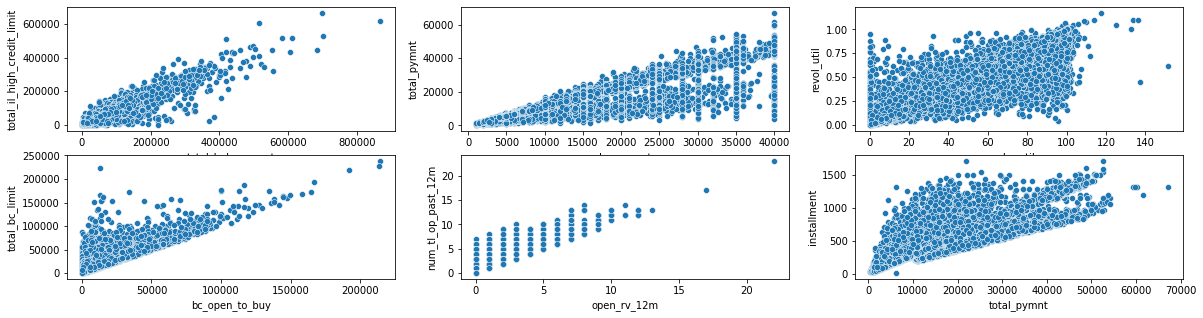

In [ ]:
plt.figure(figsize = [20, 5]) 


plt.subplot(2, 3, 1)
sns.scatterplot(x=df.total_bal_ex_mort, y=df.total_il_high_credit_limit)
	
plt.subplot(2, 3, 2)
sns.scatterplot(x=df.loan_amnt, y=df.total_pymnt)
	
plt.subplot(2, 3, 3)
sns.scatterplot(x=df.bc_util, y=df.revol_util)
	
plt.subplot(2, 3, 4)
sns.scatterplot(x=df.bc_open_to_buy, y=df.total_bc_limit)
	 
plt.subplot(2, 3, 5)
sns.scatterplot(x=df.open_rv_12m, y=df.num_tl_op_past_12m)
	
plt.subplot(2, 3, 6)
sns.scatterplot(x=df.total_pymnt, y=df.installment)
	 
plt.show()


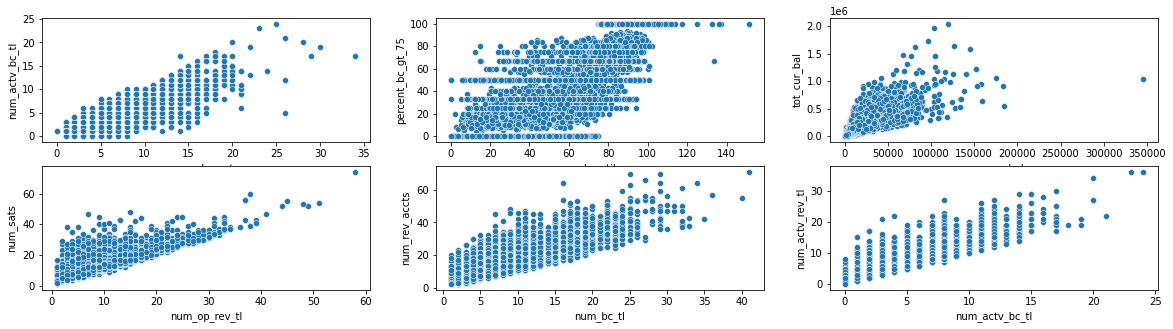

In [ ]:
plt.figure(figsize = [20, 5]) 


plt.subplot(2, 3, 1)
sns.scatterplot(x=df.num_bc_sats, y=df.num_actv_bc_tl)
	
plt.subplot(2, 3, 2)
sns.scatterplot(x=df.bc_util, y=df.percent_bc_gt_75)
	
plt.subplot(2, 3, 3)
sns.scatterplot(x=df.avg_cur_bal, y=df.tot_cur_bal)
	
plt.subplot(2, 3, 4)
sns.scatterplot(x=df.num_op_rev_tl, y=df.num_sats)
	 
plt.subplot(2, 3, 5)
sns.scatterplot(x=df.num_bc_tl, y=df.num_rev_accts)
	
plt.subplot(2, 3, 6)
sns.scatterplot(x=df.num_actv_bc_tl, y=df.num_actv_rev_tl)
	 
plt.show()


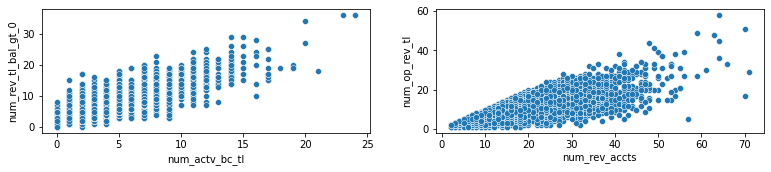

In [ ]:
plt.figure(figsize = [20, 5]) 


plt.subplot(2, 3, 1)
sns.scatterplot(x=df.num_actv_bc_tl, y=df.num_rev_tl_bal_gt_0)
	
plt.subplot(2, 3, 2)
sns.scatterplot(x=df.num_rev_accts, y=df.num_op_rev_tl)
		 
plt.show()


In [ ]:
df.shape

(15848, 62)

# Finally, I will save the modified Data Set after Wrampling it


In [ ]:
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"